In [16]:
import pickle
from val_error_experiment import mean_error_per_index
import jax.numpy as jnp
import numpy as np
from data import load_data
import pandas as pd
from optimization import compute_poincare_dists
import seaborn as sns

In [5]:
data = load_data()
data.head()

,Dyna.-Pla test mIoU,Dyna.-Pla val mIoU,Dyna.-S2 seg val mIoU,Dyna.-S2 seg test mIoU,OSCD f1,Dyna.-S2 CD test SCS,Dyna.-S2 CD val SCS,LEVIR-CD f1,fMoW-S2 top1acc 100%,BEN-S2 mAP,...,DOTA-V1.0 0.5% mAP50,DOTA-V1.0 1% mAP50,DOTA-V1.0 5% mAP50,DOTA-V2.0 mAP,LoveDA mIoU,HRCS2016 mAP,CDD f1,NWPUVHR-10 10% top1acc,DSFIN f1,WHU Aerial mIoU
GeoKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResNet50 IN,NaN,NaN,NaN,NaN,11.45,NaN,NaN,3.48,NaN,6.16,...,2.4,4.0,3.6,5.05,3.13,0.0,2.02,NaN,27.44,7.09
MoCo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SimCLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.2,0.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BYOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.81,NaN,NaN,NaN


In [9]:
n_points = 100
dims = 2

In [25]:
coords = jnp.array(
    np.random.normal(0, 1, n_points * dims)
)  # init random coords

# we need to project the random points inside the Poincaré ball (no point x with ||x|| > 1)
vec_coords = jnp.reshape(coords, (-1, dims))
norms = jnp.linalg.norm(vec_coords, axis=-1)
norms = jnp.maximum(norms, 1)
vec_coords = vec_coords / norms[:, None] * 0.5
coords = vec_coords.flatten()


In [15]:
compute_poincare_dists(coords, 50, dims).shape

(50, 50)

<Axes: >

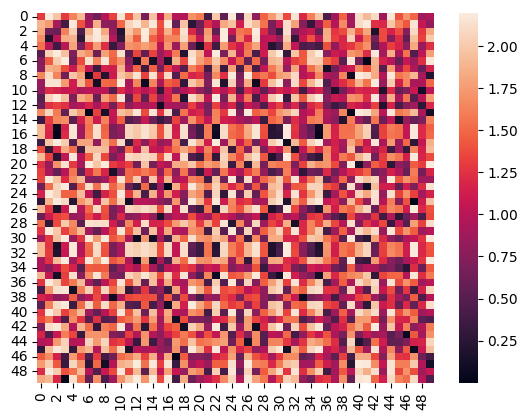

In [26]:
sns.heatmap(compute_poincare_dists(coords, 50, dims))

In [27]:
# print norms of the points
norms = jnp.linalg.norm(vec_coords, axis=-1)
norms

Array([0.3875637 , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.39111136, 0.5       , 0.5       , 0.5       , 0.21309767,
       0.5       , 0.45914561, 0.5       , 0.5       , 0.5       ,
       0.15049234, 0.5       , 0.36727223, 0.48233252, 0.5       ,
       0.3664666 , 0.34568768, 0.5       , 0.5       , 0.5       ,
       0.2674459 , 0.5       , 0.5       , 0.23785577, 0.42811034,
       0.5       , 0.5       , 0.48629712, 0.17871137, 0.45554109,
       0.5       , 0.36145713, 0.13224201, 0.28417756, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.13666319, 0.5       ,
       0.25924971, 0.2963667 , 0.5       , 0.11341625, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.35038282,
       0.5       , 0.5       , 0.36628469, 0.5       , 0.5       ,
       0.05729225, 0.5       , 0.11362804, 0.5       , 0.29415539,
       0.5       , 0.5       , 0.5       , 0.42901274, 0.5       ,
       0.5       , 0.25269013, 0.5       , 0.5       , 0.5    